In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold , SelectKBest ,f_classif
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin ,BaseEstimator
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



In [2]:
data=pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [6]:
discrete=data.select_dtypes(include=["int64"]).columns
discrete

Index([], dtype='object')

In [7]:
continous=data.select_dtypes(include=["float64"]).columns
continous

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [8]:
objected=data.select_dtypes("object").columns
objected

Index(['Address'], dtype='object')

In [9]:
data["Address"].value_counts().head(10)

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
PSC 3528, Box 7580\nAPO AE 08696-0234                            1
242 Mark Common Apt. 060\nJohnside, SD 09329-2233                1
94939 John Mill Apt. 765\nNew Scott, KS 61292                    1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
93529 Bartlett Ridges\nLeeview, AS 96540-6448                    1
Name: count, dtype: int64

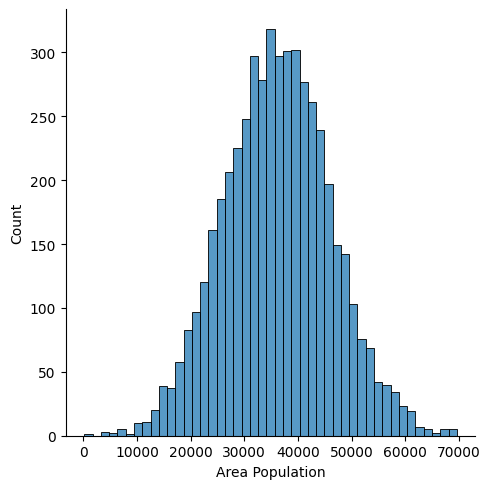

In [10]:
sns.displot(data["Area Population"])

<Axes: xlabel='Avg. Area House Age', ylabel='Density'>

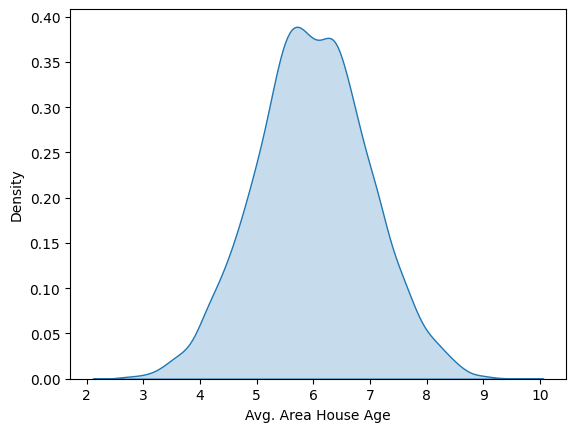

In [11]:
sns.kdeplot(data["Avg. Area House Age"],fill=True)

<Axes: ylabel='Density'>

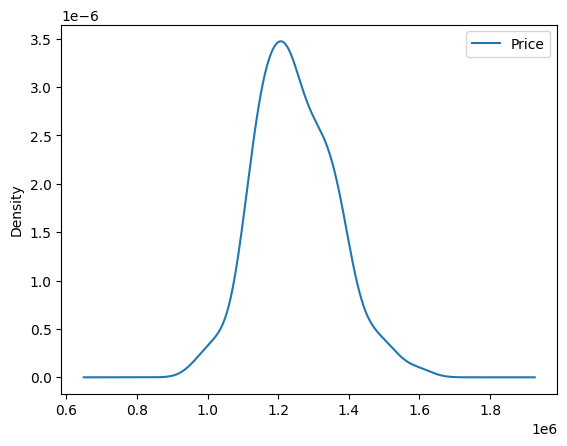

In [12]:
data.groupby(["Avg. Area Number of Bedrooms"])["Price"].mean().sort_values(ascending=True).plot(kind="kde",legend=True)

In [13]:
#convert all categorical (object_data) into Numerical data:
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,4253,1942,2512,111,468,1563,962
1,4223,2565,1972,60,3274,3890,863
2,1221,2298,4689,166,2642,1562,4069
3,1572,4446,412,77,2122,2671,4794
4,1037,854,3992,125,827,225,4736
...,...,...,...,...,...,...,...
4995,1108,4847,1011,97,440,1570,4750
4996,4135,4223,1685,104,735,3798,4636
4997,1581,4506,87,13,1941,1411,1897
4998,2363,1644,2758,197,3707,2308,4833


In [14]:
data.isna().mean()

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

In [15]:
data=data.fillna({
    "Area Population":data["Area Population"].median(),
    "Avg. Area Income":data["Avg. Area Income"].median()
                 })

In [16]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [17]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,2499.500000,2499.500000,113.245400,2499.500000,2499.500000,2499.500000
std,1443.520003,1443.520003,1443.520003,64.174484,1443.520003,1443.520003,1443.520003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,1249.750000,1249.750000,65.000000,1249.750000,1249.750000,1249.750000
50%,2499.500000,2499.500000,2499.500000,107.000000,2499.500000,2499.500000,2499.500000
75%,3749.250000,3749.250000,3749.250000,151.000000,3749.250000,3749.250000,3749.250000
max,4999.000000,4999.000000,4999.000000,254.000000,4999.000000,4999.000000,4999.000000


<Axes: xlabel='Area Population'>

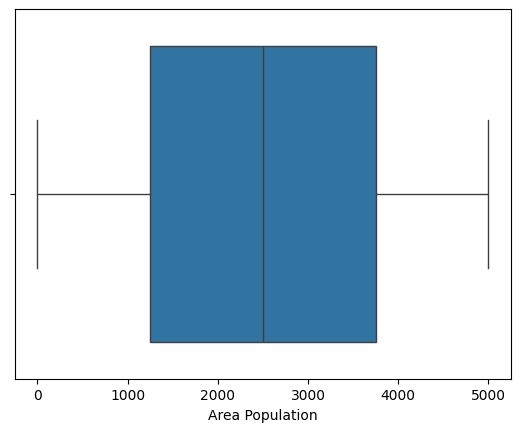

In [18]:
# check the outliers in Area population:

sns.boxplot(x=data["Area Population"])
# there in this column alittle outlier

<Axes: xlabel='Area Population'>

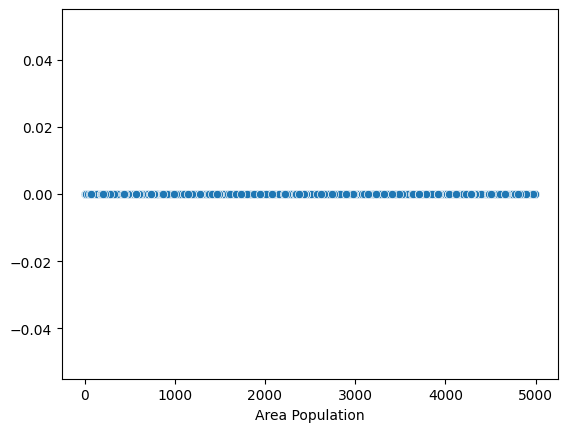

In [19]:
sns.scatterplot(x=data["Area Population"],y=np.zeros_like(data["Area Population"]))

<Axes: xlabel='Avg. Area Income'>

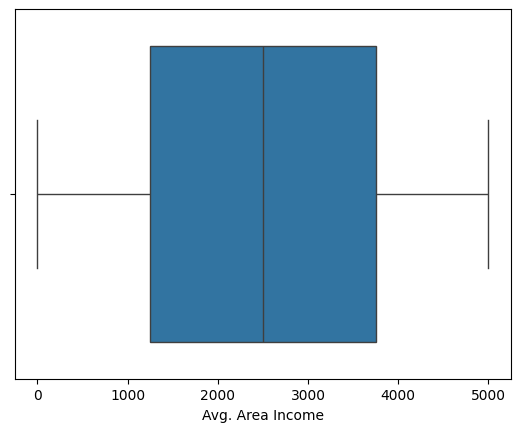

In [20]:
sns.boxplot(x=data["Avg. Area Income"])
# there alittle outliers:

<Axes: xlabel='Avg. Area Income'>

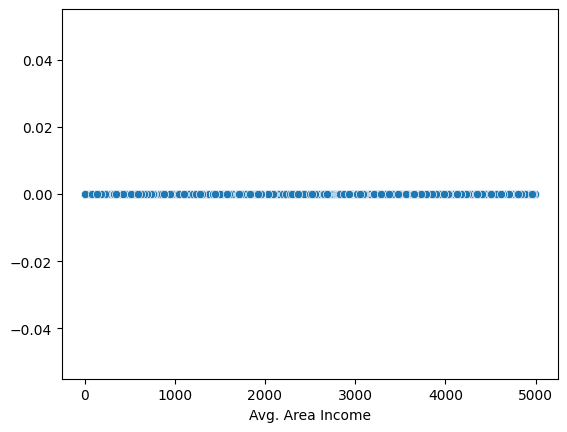

In [21]:
sns.scatterplot(x=data["Avg. Area Income"],y=np.zeros_like(data["Area Population"]))

In [22]:
# calc the outlier for Avg.Area income:

Q1,Q3=data["Avg. Area Income"].quantile([0.25,0.75])
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

outlier=[]

for x in data["Avg. Area Income"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)

In [23]:
print("Q1_Avg. Area Income",Q1)
print("Q3_Avg. Area Income",Q3)
print("IQR_Avg. Area Income",IQR)
print("low_limit_Avg. Area Income",low_limit)
print("upper_limit_Avg. Area Income",upper_limit)
print("outliers_Avg. Area Income",outlier)

Q1_Avg. Area Income 1249.75
Q3_Avg. Area Income 3749.25
IQR_Avg. Area Income 2499.5
low_limit_Avg. Area Income -2499.5
upper_limit_Avg. Area Income 7498.5
outliers_Avg. Area Income []


In [24]:
len(outlier)

0

In [25]:
num_cols=data.select_dtypes("number").columns
num_cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6])

In [27]:
num_cols[selector.get_support(indices=True)]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [28]:
df=data.T
duplicates_features=df.duplicated().sum()
print(duplicates_features)
data.drop_duplicates()

0


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,4253,1942,2512,111,468,1563,962
1,4223,2565,1972,60,3274,3890,863
2,1221,2298,4689,166,2642,1562,4069
3,1572,4446,412,77,2122,2671,4794
4,1037,854,3992,125,827,225,4736
...,...,...,...,...,...,...,...
4995,1108,4847,1011,97,440,1570,4750
4996,4135,4223,1685,104,735,3798,4636
4997,1581,4506,87,13,1941,1411,1897
4998,2363,1644,2758,197,3707,2308,4833


In [29]:
from sklearn.feature_selection import SelectKBest ,f_classif

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Avg. Area Income").select_dtypes("number").fillna(0),data["Avg. Area Income"])


/home/abdalrahman/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


SelectKBest(k=5)

In [30]:
print(["{:10f}"].format(p) for p in fs.pvalues_)
print(["{:10f}"].format(p) for p in fs.scores_)

<generator object <genexpr> at 0x7fe434546f90>
<generator object <genexpr> at 0x7fe434546f90>


In [31]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Avg. Area Income").select_dtypes("number").fillna(0).columns)
feature_scores=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_scores.columns=["pvalues","scores","inputs"]
feature_scores

,pvalues,scores,inputs
0,NaN,NaN,Avg. Area House Age
1,NaN,NaN,Avg. Area Number of Rooms
2,NaN,NaN,Avg. Area Number of Bedrooms
3,NaN,NaN,Area Population
4,NaN,NaN,Price
5,NaN,NaN,Address


In [32]:
data.select_dtypes("number").corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.001651,-0.018467,0.017602,-0.011165,0.619962,0.002989
Avg. Area House Age,-0.001651,1.000000,-0.005198,0.008656,-0.012077,0.442725,-0.009986
Avg. Area Number of Rooms,-0.018467,-0.005198,1.000000,0.490742,0.002518,0.317924,0.014251
Avg. Area Number of Bedrooms,0.017602,0.008656,0.490742,1.000000,-0.022816,0.164657,0.024041
Area Population,-0.011165,-0.012077,0.002518,-0.022816,1.000000,0.394649,0.019342
Price,0.619962,0.442725,0.317924,0.164657,0.394649,1.000000,0.016595
Address,0.002989,-0.009986,0.014251,0.024041,0.019342,0.016595,1.000000


Text(0.5, 1.0, 'Correlation MAtrix Heatmap')

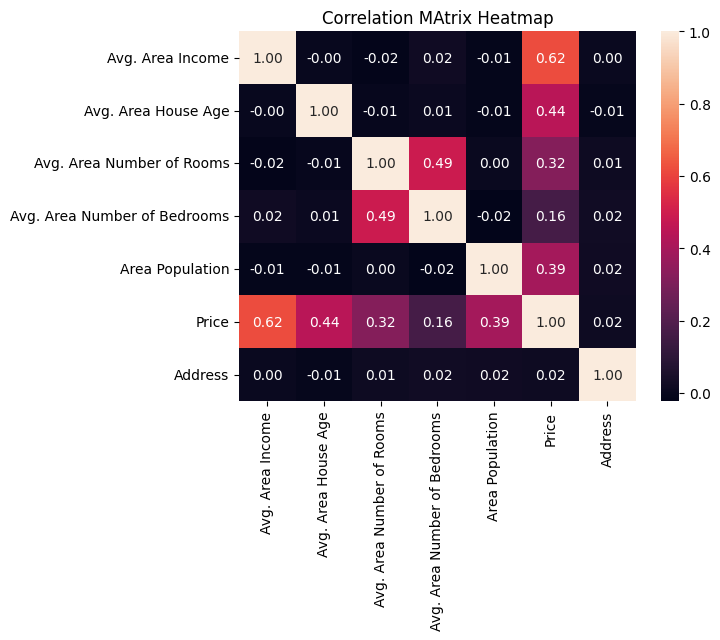

In [33]:
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("Correlation MAtrix Heatmap")

In [34]:
data.select_dtypes("number").corr(method="pearson")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.001651,-0.018467,0.017602,-0.011165,0.619962,0.002989
Avg. Area House Age,-0.001651,1.000000,-0.005198,0.008656,-0.012077,0.442725,-0.009986
Avg. Area Number of Rooms,-0.018467,-0.005198,1.000000,0.490742,0.002518,0.317924,0.014251
Avg. Area Number of Bedrooms,0.017602,0.008656,0.490742,1.000000,-0.022816,0.164657,0.024041
Area Population,-0.011165,-0.012077,0.002518,-0.022816,1.000000,0.394649,0.019342
Price,0.619962,0.442725,0.317924,0.164657,0.394649,1.000000,0.016595
Address,0.002989,-0.009986,0.014251,0.024041,0.019342,0.016595,1.000000


In [35]:
data.select_dtypes("number").corr(method="spearman")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.001651,-0.018467,0.016115,-0.011165,0.619962,0.002989
Avg. Area House Age,-0.001651,1.000000,-0.005198,0.006941,-0.012077,0.442725,-0.009986
Avg. Area Number of Rooms,-0.018467,-0.005198,1.000000,0.474590,0.002518,0.317924,0.014251
Avg. Area Number of Bedrooms,0.016115,0.006941,0.474590,1.000000,-0.022362,0.158173,0.026001
Area Population,-0.011165,-0.012077,0.002518,-0.022362,1.000000,0.394649,0.019342
Price,0.619962,0.442725,0.317924,0.158173,0.394649,1.000000,0.016595
Address,0.002989,-0.009986,0.014251,0.026001,0.019342,0.016595,1.000000


In [36]:
data.select_dtypes("number").corr(method="kendall")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.000949,-0.012423,0.010662,-0.007498,0.440770,0.001905
Avg. Area House Age,-0.000949,1.000000,-0.003426,0.004646,-0.007987,0.303467,-0.006691
Avg. Area Number of Rooms,-0.012423,-0.003426,1.000000,0.316081,0.001690,0.215957,0.009455
Avg. Area Number of Bedrooms,0.010662,0.004646,0.316081,1.000000,-0.014843,0.105429,0.017499
Area Population,-0.007498,-0.007987,0.001690,-0.014843,1.000000,0.269612,0.012764
Price,0.440770,0.303467,0.215957,0.105429,0.269612,1.000000,0.010921
Address,0.001905,-0.006691,0.009455,0.017499,0.012764,0.010921,1.000000


In [37]:
data=pd.get_dummies(data,dtype=float)
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,4253,1942,2512,111,468,1563,962
1,4223,2565,1972,60,3274,3890,863
2,1221,2298,4689,166,2642,1562,4069
3,1572,4446,412,77,2122,2671,4794
4,1037,854,3992,125,827,225,4736
...,...,...,...,...,...,...,...
4995,1108,4847,1011,97,440,1570,4750
4996,4135,4223,1685,104,735,3798,4636
4997,1581,4506,87,13,1941,1411,1897
4998,2363,1644,2758,197,3707,2308,4833


In [38]:
x=data.drop("Price",axis=1)
y=data["Price"]
print(np.shape(x),np.shape(y))

(5000, 6) (5000,)


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
np.shape(x_train),np.shape(x_test),np.shape(y_train),np.shape(y_test)

((3500, 6), (1500, 6), (3500,), (1500,))

In [40]:
model=RandomForestRegressor(max_depth=5,random_state=42,n_estimators=100,n_jobs=-1)

In [41]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)

In [42]:
y_predict=model.predict(x_test)
y_predict[:10]

array([2782.67382153, 2889.92512967, 2567.3739781 , 2710.40317747,
       2528.86634262, 3759.04288925, 1416.98058325,  503.05992779,
        849.64793068, 3697.93550336])

In [43]:
print(f"accuracy------>>>{model.score(x_test,y_test)*100:0.2f}%")

accuracy------>>>76.29%


In [44]:
# improve from the accuracy :
np.random.seed()
for i in range(1,101,10):
    print(f"trying accuracy model {i} n_estimator")
    model2=RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy -->> {model2.score(x_test,y_test)*100:0.2f}%")  

trying accuracy model 1 n_estimator
model accuracy -->> 68.56%
trying accuracy model 11 n_estimator
model accuracy -->> 85.35%
trying accuracy model 21 n_estimator
model accuracy -->> 86.13%
trying accuracy model 31 n_estimator
model accuracy -->> 86.83%
trying accuracy model 41 n_estimator
model accuracy -->> 87.25%
trying accuracy model 51 n_estimator
model accuracy -->> 87.25%
trying accuracy model 61 n_estimator
model accuracy -->> 87.18%
trying accuracy model 71 n_estimator
model accuracy -->> 87.32%
trying accuracy model 81 n_estimator
model accuracy -->> 87.20%
trying accuracy model 91 n_estimator
model accuracy -->> 87.26%


In [48]:
# Here End The Code